In [88]:
import numpy as np
from umap import UMAP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import defaultdict
import os
from sklearn.decomposition import PCA
import scipy
import random
random.seed(8)

In [14]:
import os
import sys

# Get the current notebook's directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))

# Add the parent directory to the module search path
sys.path.insert(0, parent_directory)
print(parent_directory)

/n/holylabs/LABS/mzitnik_lab/Users/afang/GET


In [15]:
from data.pdb_utils import VOCAB

# Graph embedding of CSD and BioLiP
To see if they occupy different areas of the latent space

In [10]:
embedding_dir1 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/BioLiP"
embedding_dir2 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/CSD"
out_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/both_BioLiP_CSD"

In [12]:

if os.path.exists(f"{out_dir}/graph_embedding_2d.csv"):
    df = pd.read_csv(f"{out_dir}/data_pretrained/graph_embedding_2d.csv")
else:
    with open(f"{embedding_dir1}/data_pretrained/graph_embeddings.npy", "rb") as f:
        embeddings1 = np.load(f)
    with open(f"{embedding_dir2}/data_pretrained/graph_embeddings.npy", "rb") as f:
        embeddings2 = np.load(f)
    
    embeddings = np.concatenate((embeddings1, embeddings2), axis=0)
    n_neighbors = 20
    min_dist = 0.1
    umap_2d = UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        init="random",
        random_state=0,
    )
    proj_2d_graph = umap_2d.fit_transform(embeddings)

    df = pd.DataFrame(proj_2d_graph, columns=["x", "y"])
    df["source"] = ["BioLiP"] * embeddings1.shape[0] + ["CSD"] * embeddings2.shape[0]
    df.to_csv(f"{out_dir}/graph_embedding_2d.csv", index=False)

/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


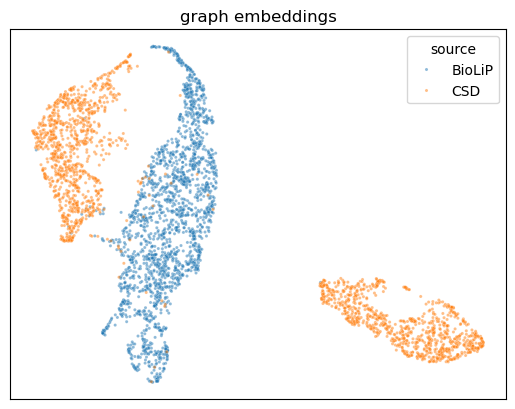

In [13]:
ax = sns.scatterplot(
    data=df,
    x="x",
    y="y",
    hue="source",
    alpha=0.5,
    s=5,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.title("graph embeddings")
plt.show()

## Follow up?
Do different subsets of QBioLIP occupy different areas of the latent space?

# Atom embeddings

In [16]:
embedding_dir1 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/BioLiP"
embedding_dir2 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/CSD"

In [43]:
element_type = {
    'H': 'Nonmetal',
    'B': 'Metalloid',
    'C': 'Nonmetal',
    'N': 'Nonmetal',
    'O': 'Nonmetal',
    'F': 'Halogen',
    'Mg': 'Alkaline earth metal',
    'Al': 'Post-transition metal',
    'P': 'Nonmetal',
    'S': 'Nonmetal',
    'Cl': 'Halogen',
    'Ca': 'Alkaline earth metal',
    'V': 'Transition metal',
    'Mn': 'Transition metal',
    'Fe': 'Transition metal',
    'Co': 'Transition metal',
    'Se': 'Nonmetal',
    'Br': 'Halogen',
    'Y': 'Transition metal',
    'Mo': 'Transition metal',
    'Ru': 'Transition metal',
    'Pd': 'Transition metal',
    'I': 'Halogen',
    'Xe': 'Noble gas',
    'Ta': 'Transition metal',
    'W': 'Transition metal',
    'Re': 'Transition metal',
    'Si': 'Metalloid',
    'As': 'Metalloid',
    'Te': 'Metalloid',
}

type_color = {
    'Nonmetal': '#FFD700',
    'Halogen': '#FF4500',
    'Alkali metal': '#8A2BE2',
    'Alkaline earth metal': '#00BFFF',
    'Transition metal': '#20B2AA',
    'Metalloid': '#7FFFD4',
    'Post-transition metal': '#B8860B',
    'Noble gas': '#6495ED',
}

In [79]:
with open(f"{embedding_dir1}/data_pretrained/atom_id.npy", "rb") as f:
    atom_id1 = np.load(f)
with open(f"{embedding_dir1}/data_pretrained/atom_embeddings.npy", "rb") as f:
    atom_embeddings1 = np.load(f)

atom_embeddings1 = atom_embeddings1[atom_id1 > 2]
atom_id1 = atom_id1[atom_id1 > 2]
atom_embeddings1 = atom_embeddings1[:, :atom_embeddings1.shape[1]//2]


# Unique group IDs
unique_atoms1 = np.unique(atom_id1)

# Initialize an empty list to store the mean of each group
group_means1 = []

# Iterate over each group and compute the mean
for group in unique_atoms1:
    group_mask = atom_id1 == group
    group_rows = atom_embeddings1[group_mask]
    group_mean = np.mean(group_rows, axis=0)
    group_means1.append(group_mean)

# Convert list of group means to a numpy array if needed
group_means_array1 = np.array(group_means1)

pca = PCA(n_components=2)
aa_pca1 = pca.fit_transform(group_means_array1)
df1 = pd.DataFrame(aa_pca1, columns=["x", "y"])
df1["atom_index"] = unique_atoms1

with open(f"{embedding_dir2}/data_pretrained/atom_id.npy", "rb") as f:
    atom_id2 = np.load(f)
with open(f"{embedding_dir2}/data_pretrained/atom_embeddings.npy", "rb") as f:
    atom_embeddings2 = np.load(f)

atom_embeddings2 = atom_embeddings2[atom_id2 > 2]
atom_id2 = atom_id2[atom_id2 > 2]
atom_embeddings2 = atom_embeddings2[:, :atom_embeddings2.shape[1]//2]


# Unique group IDs
unique_atoms2 = np.unique(atom_id2)

# Initialize an empty list to store the mean of each group
group_means2 = []

# Iterate over each group and compute the mean
for group in unique_atoms2:
    group_mask = atom_id2 == group
    group_rows = atom_embeddings2[group_mask]
    group_mean = np.mean(group_rows, axis=0)
    group_means2.append(group_mean)

# Convert list of group means to a numpy array if needed
group_means_array2 = np.array(group_means2)

pca = PCA(n_components=2)
aa_pca2 = pca.fit_transform(group_means_array2)
df2 = pd.DataFrame(aa_pca2, columns=["x", "y"])
df2["atom_index"] = unique_atoms2


df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
df["source"] = ["BioLiP"] * aa_pca1.shape[0] + ["CSD"] * aa_pca2.shape[0]
df["element"] = [VOCAB.idx_to_atom(i) for i in df["atom_index"]]
df["type"] = [element_type.get(VOCAB.idx_to_atom(i), "unknown") for i in df["atom_index"]]

In [80]:
df

,x,y,atom_index,source,element,type
0,0.041219,-0.153040,3,BioLiP,H,Nonmetal
1,-0.165286,-0.048926,7,BioLiP,B,Metalloid
2,0.644466,-0.139279,8,BioLiP,C,Nonmetal
3,0.674753,-0.335424,9,BioLiP,N,Nonmetal
4,0.570003,-0.043921,10,BioLiP,O,Nonmetal
5,-0.047788,-0.149766,11,BioLiP,F,Halogen
6,0.175598,0.427650,14,BioLiP,Mg,Alkaline earth metal
7,-0.291827,0.009321,15,BioLiP,Al,Post-transition metal
8,-0.054958,0.004263,17,BioLiP,P,Nonmetal
9,0.301582,0.034225,18,BioLiP,S,Nonmetal


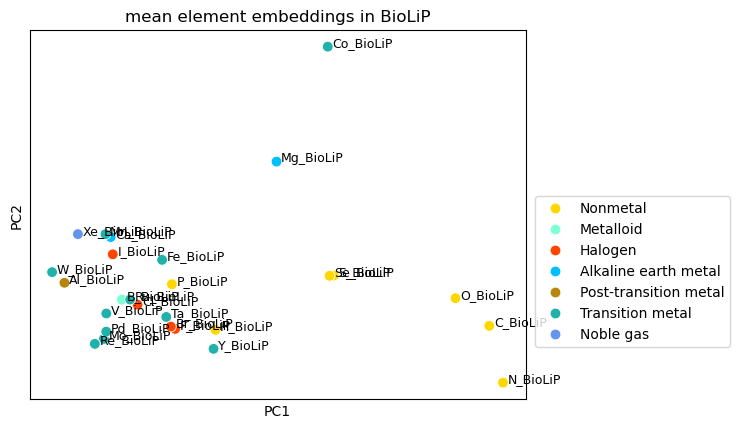

In [53]:
plot_df = df[df["source"] == "BioLiP"]
plot_df = plot_df.reset_index(drop=True)
ax = sns.scatterplot(
    data=plot_df,
    x="x",
    y="y",
    hue="type",
    alpha=1,
    s=60,
    palette=type_color,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
for i in range(len(plot_df['x'])):
    plt.text(plot_df['x'][i] + 0.01,  # X position, with a slight offset to avoid overlapping the point
             plot_df['y'][i],       # Y position
             plot_df["element"][i] + "_" + plot_df["source"][i],  # Text label
             fontsize=9)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc="upper left", borderaxespad=0)
plt.title("mean element embeddings in BioLiP")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

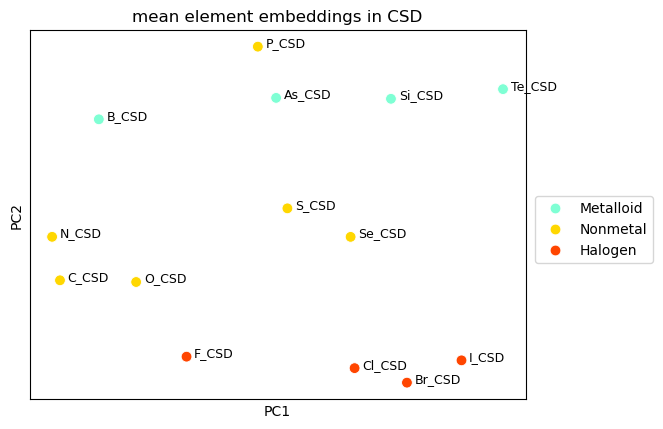

In [52]:
plot_df = df[df["source"] == "CSD"]
plot_df = plot_df.reset_index(drop=True)
ax = sns.scatterplot(
    data=plot_df,
    x="x",
    y="y",
    hue="type",
    alpha=1,
    s=60,
    palette=type_color,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
for i in range(len(plot_df['x'])):
    plt.text(plot_df['x'][i] + 0.01,  # X position, with a slight offset to avoid overlapping the point
             plot_df['y'][i],       # Y position
             plot_df["element"][i] + "_" + plot_df["source"][i],  # Text label
             fontsize=9)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc="upper left", borderaxespad=0)
plt.title("mean element embeddings in CSD")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## How different are the embeddings of the same atom in different datasets

In [62]:
common_atoms = set(unique_atoms1).intersection(set(unique_atoms2))

In [77]:
with open(f"{embedding_dir1}/data_pretrained/atom_id.npy", "rb") as f:
    atom_id = np.load(f)

value_counts = np.unique(atom_id, return_counts=True)
value_counts = dict(zip([VOCAB.idx_to_atom(i) for i in value_counts[0]], value_counts[1]))
value_counts

{'g': 4000,
 'H': 8,
 'B': 4,
 'C': 305474,
 'N': 76323,
 'O': 89297,
 'F': 44,
 'Mg': 362,
 'Al': 1,
 'P': 1202,
 'S': 2958,
 'Cl': 37,
 'Ca': 1,
 'V': 1,
 'Mn': 4,
 'Fe': 258,
 'Co': 2,
 'Se': 51,
 'Br': 43,
 'Y': 1,
 'Mo': 1,
 'Ru': 3,
 'Pd': 1,
 'I': 8,
 'Xe': 2,
 'Ta': 18,
 'W': 2,
 'Re': 2}

In [78]:
with open(f"{embedding_dir2}/data_pretrained/atom_id.npy", "rb") as f:
    atom_id = np.load(f)

value_counts = np.unique(atom_id, return_counts=True)
value_counts = dict(zip([VOCAB.idx_to_atom(i) for i in value_counts[0]], value_counts[1]))
value_counts

{'g': 4000,
 'B': 356,
 'C': 78247,
 'N': 7215,
 'O': 10860,
 'F': 2381,
 'Si': 161,
 'P': 245,
 'S': 1397,
 'Cl': 708,
 'As': 20,
 'Se': 104,
 'Br': 333,
 'Te': 6,
 'I': 82}

In [81]:
atom_id1.shape

(476108,)

In [82]:
atom_embeddings1.shape

(476108, 40)

In [96]:
np.where(atom_id1 == element)

(array([ 10090,  33378,  33426,  48361,  50243,  70658,  71429,  89396,
         89628,  90877, 103143, 129925, 130028, 130036, 143771, 165263,
        165457, 165465, 173904, 189713, 201341, 253710, 271010, 271062,
        277186, 317391, 325354, 352631, 352645, 352769, 353804, 353834,
        358997, 359011, 368913, 373420, 373980, 374191, 374199, 377680,
        403447, 403463, 411336, 411350, 411474, 418652, 421780, 429407,
        440551, 453530, 457373]),)

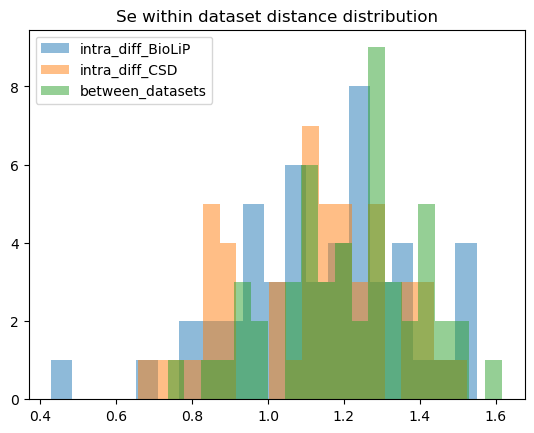

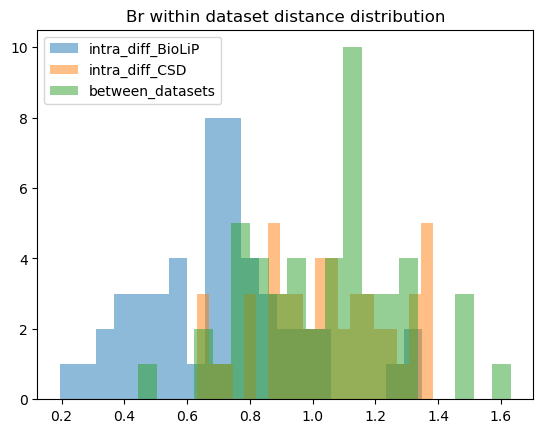

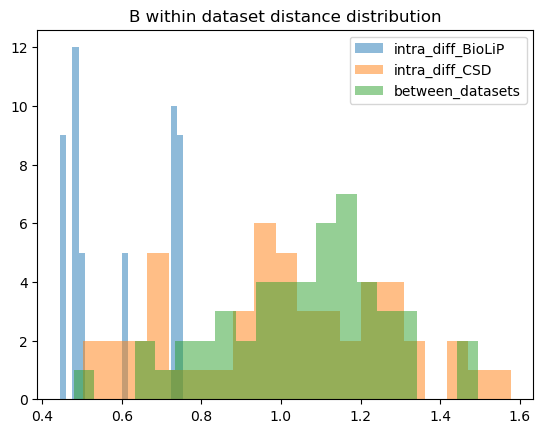

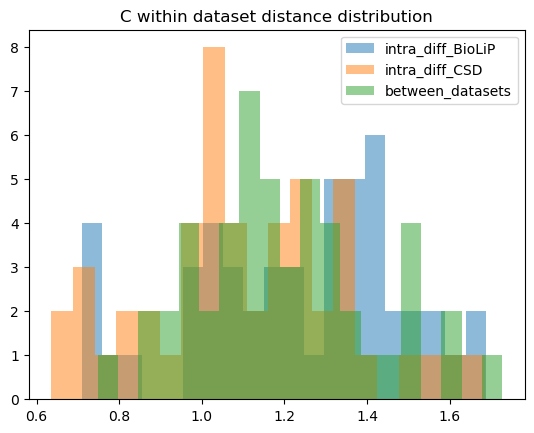

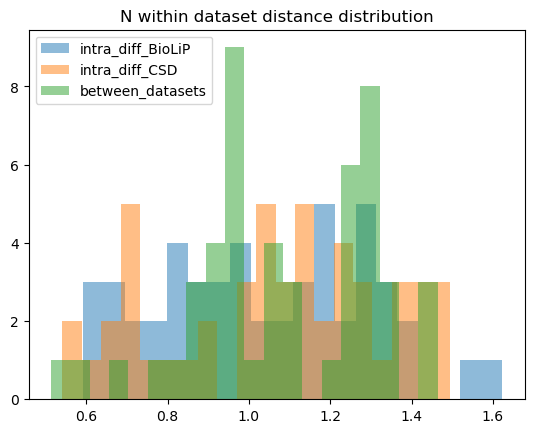

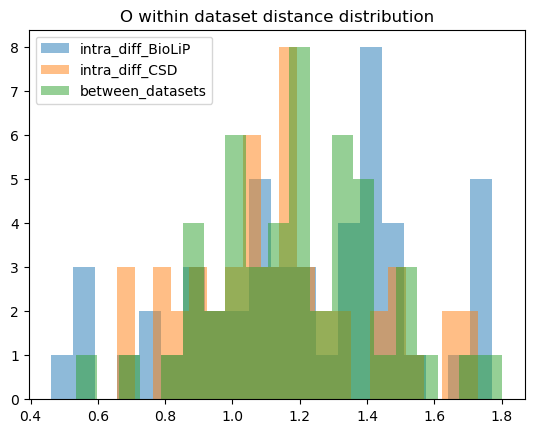

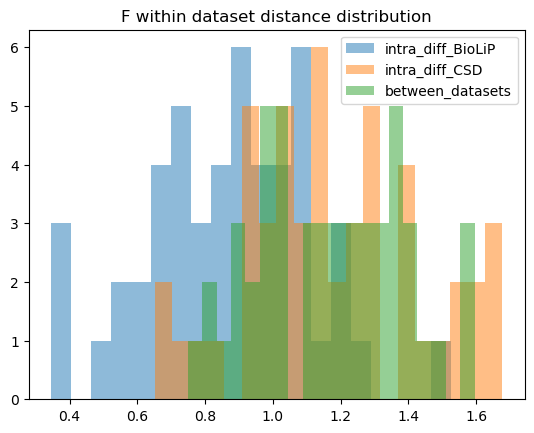

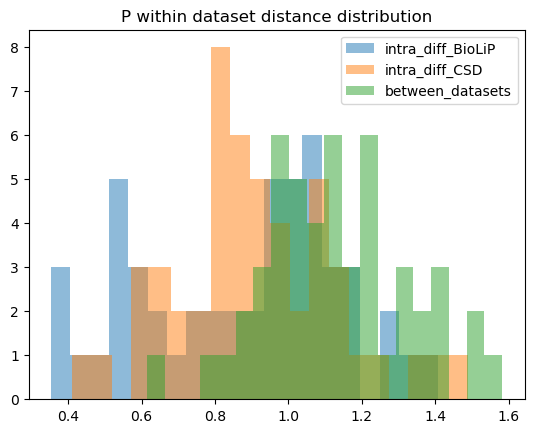

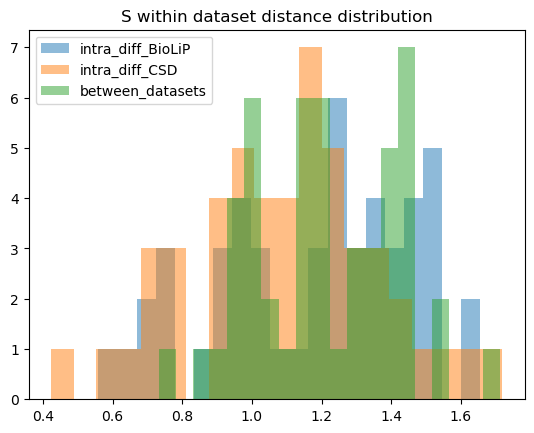

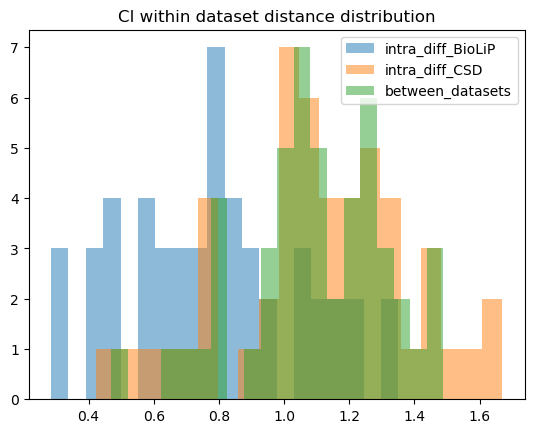

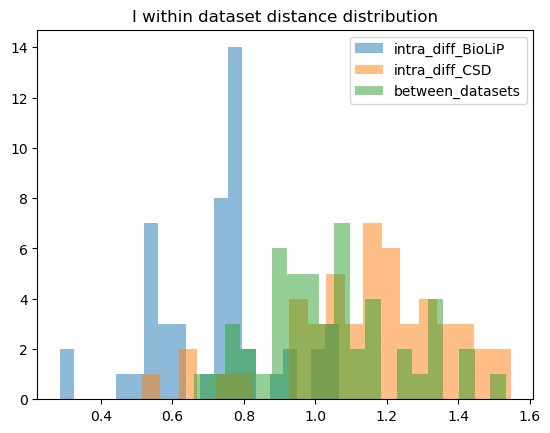

,element,distance_between_means,diff_to_BioLIP_statistic,diff_to_BioLIP_pvalue,diff_to_CSD_statistic,diff_to_CSD_pvalue
0,Se,0.295191,0.22,1.785867e-01,0.26,0.067795
1,Br,0.510515,0.56,1.453458e-07,0.10,0.966746
2,B,0.744119,0.92,7.773164e-23,0.16,0.548685
3,C,0.232413,0.24,1.123852e-01,0.26,0.067795
4,N,0.318424,0.20,2.719136e-01,0.16,0.548685
5,O,0.299346,0.20,2.719136e-01,0.20,0.271914
6,F,0.550559,0.48,1.386789e-05,0.10,0.966746
7,P,0.654140,0.38,1.314774e-03,0.48,0.000014
8,S,0.302560,0.16,5.486851e-01,0.22,0.178587
9,Cl,0.469858,0.60,1.062496e-08,0.10,0.966746


In [115]:
rows = []
num_pairs = 50
for element in common_atoms:
    idx1 = np.where(unique_atoms1 == element)[0][0]
    idx2 = np.where(unique_atoms2 == element)[0][0]

    dist = np.linalg.norm(group_means_array1[idx1] - group_means_array2[idx2])

    idxs1 = sorted(list(np.where(atom_id1 == element)[0]))
    idxs2 = sorted(list(np.where(atom_id2 == element)[0]))
    intra_samples1 = [random.sample(idxs1, 2) for _ in range(num_pairs)]
    intra_samples2 = [random.sample(idxs2, 2) for _ in range(num_pairs)]
    inter_samples = [random.sample(idxs1, 1) + random.sample(idxs2, 1) for _ in range(num_pairs)]
    intra_diff1 = [np.linalg.norm(atom_embeddings1[sample[0]] - atom_embeddings1[sample[1]]) for sample in intra_samples1]
    intra_diff2 = [np.linalg.norm(atom_embeddings2[sample[0]] - atom_embeddings2[sample[1]]) for sample in intra_samples2]
    inter_diff = [np.linalg.norm(atom_embeddings1[sample[0]] - atom_embeddings2[sample[1]]) for sample in inter_samples]
    plt.hist(intra_diff1, bins=20, alpha=0.5, label='intra_diff_BioLiP')
    plt.hist(intra_diff2, bins=20, alpha=0.5, label='intra_diff_CSD')
    plt.hist(inter_diff, bins=20, alpha=0.5, label='between_datasets')
    plt.title(f"{VOCAB.idx_to_atom(element)} within dataset distance distribution")
    plt.legend()
    plt.show()
    diff_1 = scipy.stats.ks_2samp(sorted(intra_diff1), sorted(inter_diff))
    diff_2 = scipy.stats.ks_2samp(sorted(intra_diff2), sorted(inter_diff))
    rows.append([VOCAB.idx_to_atom(element), dist, diff_1.statistic, diff_1.pvalue, diff_2.statistic, diff_2.pvalue])

diff_df = pd.DataFrame(rows, columns=["element", "distance_between_means", "diff_to_BioLIP_statistic", "diff_to_BioLIP_pvalue", "diff_to_CSD_statistic", "diff_to_CSD_pvalue"])
diff_df
